In [1]:
%load_ext autoreload
%autoreload 2
import SRmodellib_lifelines as srl
import sr_mcmc as srmc
import numpy as np
import matplotlib.pyplot as plt
import deathTimesDataSet as dtds
import SRmodellib as sr
import config_lib as cl
import deathTimesDataSet as dtds

In [4]:
import readResults as rr
seed_res = rr.readResultsFile("seeds/Yeast.csv")
res_df = seed_res[1]
seed = rr.getTheta(res_df)
print(seed)
seed_res = rr.readResultsFile("seeds/testuser.csv")
res_df = seed_res[1]
seed = rr.getTheta(res_df)
print(seed)

Reading Yeast
[9.000e-02 2.400e-02 1.905e+01 5.186e+01]
Reading testuser


FileNotFoundError: [Errno 2] No such file or directory: 'seeds/testuser.csv'

In [2]:
npeople =20000
t_end = 70
nsteps = 5000
theta_trans = np.array([8.50845720e3, 4.74231408e-02, 1.85932917e1, 7.92489561e2])
theta = np.array([8242.69524050461, 2.2334034925097384, 13.40814813060696, 782.5300200184444])
# theta = srmc.inv_transform(theta_trans)
sim1 = srmc.getSr(theta,npeople=npeople,t_end=t_end,nsteps=nsteps)

In [3]:
sim_m =srl.SR_lf_karin_human(npeople=npeople,t_end=120,nsteps=nsteps,time_step_multiplier=30,parallel=True)

In [7]:
sim_f =srl.SR_lf_karin_human(xc=0.9,npeople=npeople,t_end=120,nsteps=nsteps,time_step_multiplier=30,parallel=True)

In [8]:
sim_Avi =srl.SR_lf_karin_human(xc=0.75,npeople=npeople,t_end=120,nsteps=nsteps,time_step_multiplier=30,parallel=True)

In [9]:
dsm =dtds.dsFromFile('datasets/human_m_ds.csv')
dsf =dtds.dsFromFile('datasets/human_f_ds.csv')

ValueError: 'bottom left' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

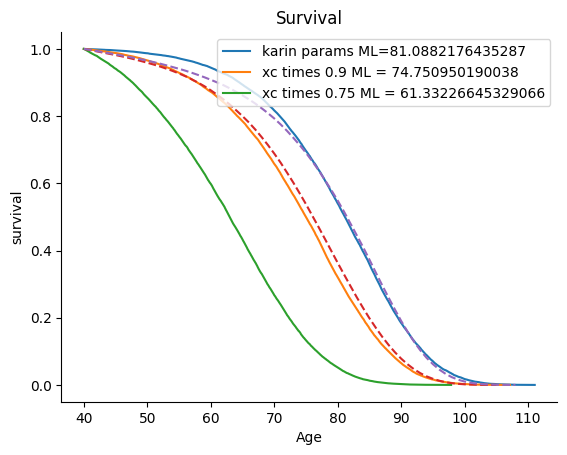

In [10]:
time_range = [40,120]
ax = sim_m.plotSurvival(time_range=time_range,label= f'karin params ML={sim_m.getMedianLifetime()}')
sim_f.plotSurvival(ax=ax,time_range=time_range, label =f'xc times 0.9 ML = {sim_f.getMedianLifetime()}')
sim_Avi.plotSurvival(ax=ax,time_range=time_range, label = f'xc times 0.75 ML = {sim_Avi.getMedianLifetime()}')
dsm.plotSurvival(ax=ax, time_range=time_range, label="human men data Sweden 1900-1904 cohort", linestyle='--')
dsf.plotSurvival(ax=ax,time_range=time_range, label = "human female data Sweden 1900-1904 cohort",linestyle='--')
ax.legend(loc='bottom left')
print(sim_m.getMedianLifetime())
print(sim_f.getMedianLifetime())

In [ ]:
ds = dtds.dsFromFile('datasets/yeast_ds.csv')
sim = dtds.dsFromFile('death_times_8242.69524050461_2.2334034925097384_13.40814813060696_782.5300200184444.csv')

<Axes: xlabel='timeline'>

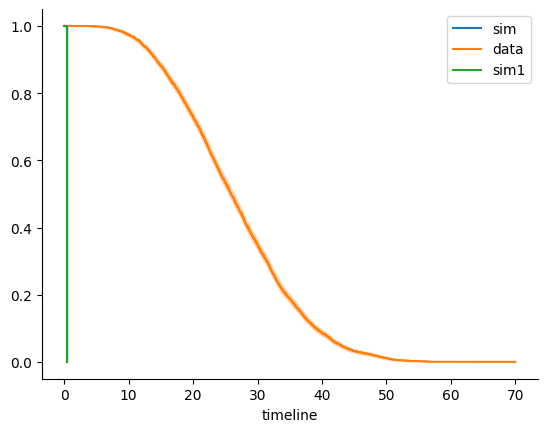

In [ ]:
ax=sim.plotSurvival(label='sim')
ds.plotSurvival(ax=ax, label='data')
sim1.plotSurvival(ax=ax, label='sim1')

In [ ]:
dtdis = sim1.getDeathTimes()
dtdis[0:10]

array([0.44808962, 0.44808962, 0.44808962, 0.44808962, 0.44808962,
       0.44808962, 0.44808962, 0.44808962, 0.44808962, 0.44808962])

(<Axes: xlabel='Death time (days)', ylabel='Probability of death'>, None)

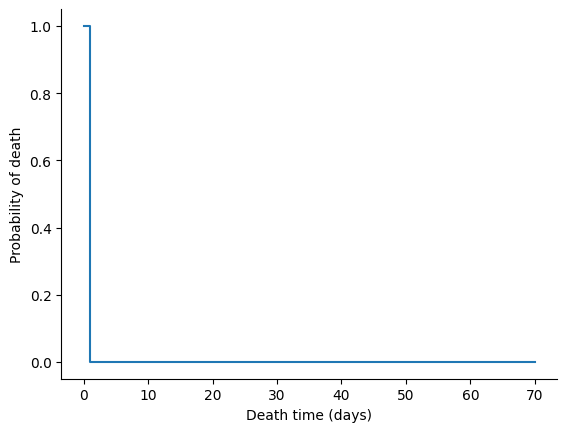

In [ ]:
sim1.plotDeathTimesDistribution()

In [ ]:
# from tqdm import tqdm

# for _ in tqdm(range(1000)):
#     sim = srmc.getSr(theta, npeople=npeople, t_end=t_end, nsteps=nsteps)
d = sr.baysianDistance(ds, sim)

In [ ]:
print(d)

nan


In [4]:
test = sr.SR(eta =0.5,beta =52, kappa=0.5,epsilon=48,xc=20, npeople=2000, t_end=150, nsteps = 20000,death_times_method=0)

In [12]:
test_no_beta=sr.SR(eta =0.5,beta =52, kappa=0.5,epsilon=48,xc=20, npeople=2000, t_end=2000, nsteps = 20000,death_times_method=0)

<Axes: title={'center': 'Survival'}, xlabel='time [years]', ylabel='survival'>

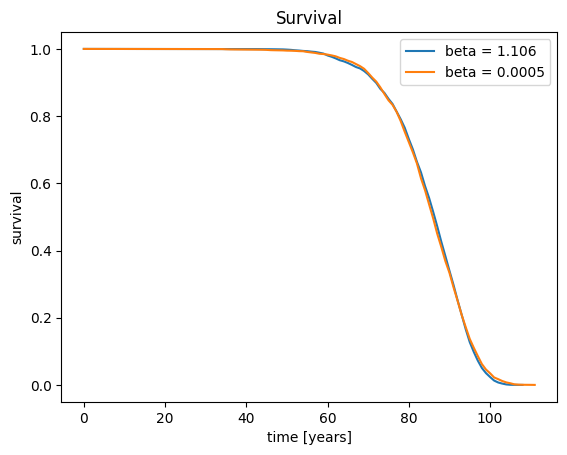

In [13]:
ax=test.plotSurvival(label='beta = 1.106')
test_no_beta.plotSurvival(ax=ax,label='beta = 0.0005')

/var/folders/pr/hngn4yrn3v3gt3069stbsfqh0000gp/T/ipykernel_25569/3162347832.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0','','','',r'$x_c$'],fontsize=12)


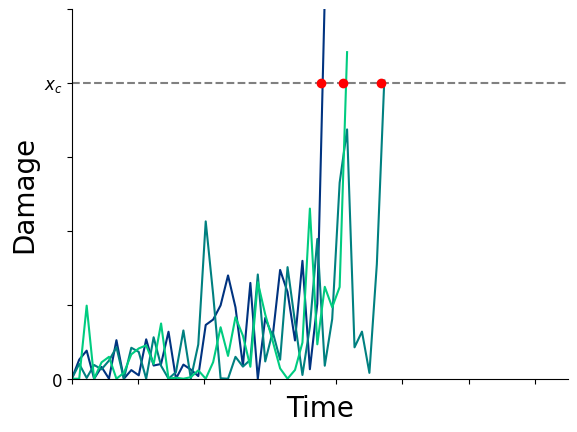

In [142]:
ax=test.plotTrajectoriies(3,resample_traj=300,randomize_index=True)
ax.set_xlim([0,150])
ax.set_xlabel('Time',fontsize=20)
ax.set_ylabel('Damage',fontsize=20)
#remove numbers from axes:
ax.set_yticklabels(['0','','','',r'$x_c$'],fontsize=12)
ax.set_xticklabels([])
ax.set_ylim([0,25])
# ax.axvline(824.86, color='r', linestyle='--')
fig = ax.get_figure()
fig.savefig('plots/trajectories_for_fig1.svg',format='svg')

/Volumes/alon/navehr/baysian01/SRmodellib.py:530: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


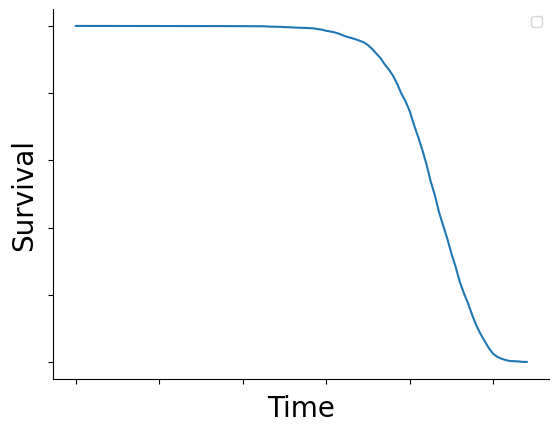

In [6]:
fig,ax = plt.subplots()
test.plotSurvival(ax=ax)
# remove numbers from axes:
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xlabel('Time',fontsize=20)
ax.set_ylabel('Survival',fontsize=20)
#remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#remove title:
ax.set_title('')
fig.savefig('plots/survival_for_fig1.svg',transparent=True,format='svg')

In [16]:
5.733*np.sqrt(60)

44.40762704761424

In [17]:
824.86*0.00134

1.1053124

<Axes: xlabel='Age', ylabel='Damage'>

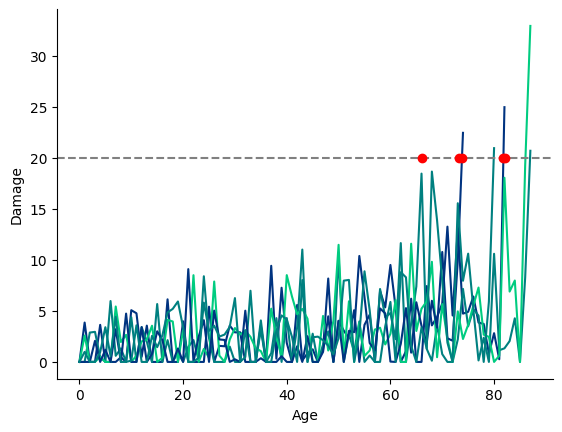

In [18]:
test_no_beta.plotTrajectoriies(5)

In [19]:
import SR_hetro as srh
import sr_mcmc as srmc


In [20]:
npeople = 5000
t_end = 110
nsteps = 5000
time_step_multiplier = 38
parallel = False

In [21]:
from memory_profiler import memory_usage

theta =srmc.karin_theta()
theta[0] =theta[0]*1.33
theta[1] =theta[1]*1.15
external_hazard = 5.8
set_params = {'external_hazard':external_hazard}
time_range = [40,110]
import cProfile
import pstats
import io
pr = cProfile.Profile()
pr.enable()
simh = srh.getSrHetro(theta, npeople=npeople, t_end=t_end, nsteps=nsteps, time_step_multiplier=time_step_multiplier, parallel=parallel, external_hazard=external_hazard)
pr.disable()

# Print profiling results
s = io.StringIO()
ps = pstats.Stats(pr, stream=s).sort_stats('cumulative')
ps.print_stats()
print(s.getvalue())

def run_simulation():
    return srh.getSrHetro(theta, npeople=npeople, t_end=t_end, nsteps=nsteps, time_step_multiplier=time_step_multiplier, parallel=parallel, external_hazard=external_hazard)

mem_usage = memory_usage(run_simulation)
# simh = run_simulation()
print(f"Memory usage: {max(mem_usage) - min(mem_usage)} MiB")

         991612 function calls (940382 primitive calls) in 11.813 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000   11.813    5.906 /Users/navehr/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3514(run_code)
        2    0.000    0.000   11.813    5.906 {built-in method builtins.exec}
        1    0.000    0.000   11.813   11.813 /var/folders/pr/hngn4yrn3v3gt3069stbsfqh0000gp/T/ipykernel_25569/2023601286.py:14(<module>)
        1    0.000    0.000   11.813   11.813 /Volumes/alon/navehr/baysian01/SR_hetro.py:47(getSrHetro)
        1    0.000    0.000   11.813   11.813 /Volumes/alon/navehr/baysian01/SR_hetro.py:18(__init__)
        1    0.000    0.000   11.813   11.813 /Volumes/alon/navehr/baysian01/SRmodellib_lifelines.py:23(__init__)
        1    0.000    0.000   11.813   11.813 /Volumes/alon/navehr/baysian01/SRmodellib.py:25(__init__)
        1    0.000    0.000  

In [22]:
import cProfile
import pstats
import io
pr = cProfile.Profile()
pr.enable()
simh = srh.getSrHetro(theta, npeople=npeople, t_end=t_end, nsteps=nsteps, time_step_multiplier=time_step_multiplier, parallel=parallel, external_hazard=external_hazard)
pr.disable()

# Print profiling results
s = io.StringIO()
ps = pstats.Stats(pr, stream=s).sort_stats('cumulative')
ps.print_stats()
print(s.getvalue())

         28658 function calls (28109 primitive calls) in 10.911 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000   10.911    5.455 /Users/navehr/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3514(run_code)
        2    0.000    0.000   10.911    5.455 {built-in method builtins.exec}
        1    0.000    0.000   10.911   10.911 /var/folders/pr/hngn4yrn3v3gt3069stbsfqh0000gp/T/ipykernel_25569/3710052993.py:6(<module>)
        1    0.000    0.000   10.910   10.910 /Volumes/alon/navehr/baysian01/SR_hetro.py:47(getSrHetro)
        1    0.000    0.000   10.910   10.910 /Volumes/alon/navehr/baysian01/SR_hetro.py:18(__init__)
        1    0.000    0.000   10.910   10.910 /Volumes/alon/navehr/baysian01/SRmodellib_lifelines.py:23(__init__)
        1    0.000    0.000   10.910   10.910 /Volumes/alon/navehr/baysian01/SRmodellib.py:25(__init__)
        1    0.000    0.000   10

In [23]:
import cProfile
import pstats
import io
pr = cProfile.Profile()
pr.enable()
simh = srmc.getSr([0.21740333, 43.66134309,  1.75121824,  1.4217005], npeople=npeople, t_end=t_end, nsteps=nsteps, time_step_multiplier=time_step_multiplier, parallel=parallel, external_hazard=5.999515591616309)
pr.disable()

# Print profiling results
s = io.StringIO()
ps = pstats.Stats(pr, stream=s).sort_stats('cumulative')
ps.print_stats()
print(s.getvalue())

         28628 function calls (28079 primitive calls) in 12.671 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000   12.671    6.336 /Users/navehr/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3514(run_code)
        2    0.000    0.000   12.671    6.336 {built-in method builtins.exec}
        1    0.000    0.000   12.671   12.671 /var/folders/pr/hngn4yrn3v3gt3069stbsfqh0000gp/T/ipykernel_25569/1649328140.py:6(<module>)
        1    0.000    0.000   12.671   12.671 /Volumes/alon/navehr/baysian01/sr_mcmc.py:462(getSr)
        1    0.000    0.000   12.671   12.671 /Volumes/alon/navehr/baysian01/SRmodellib_lifelines.py:23(__init__)
        1    0.000    0.000   12.671   12.671 /Volumes/alon/navehr/baysian01/SRmodellib.py:25(__init__)
        1    0.000    0.000   12.671   12.671 /Volumes/alon/navehr/baysian01/SRmodellib_lifelines.py:34(calc_survival_and_hazard)
        1

<Axes: xlabel='timeline'>

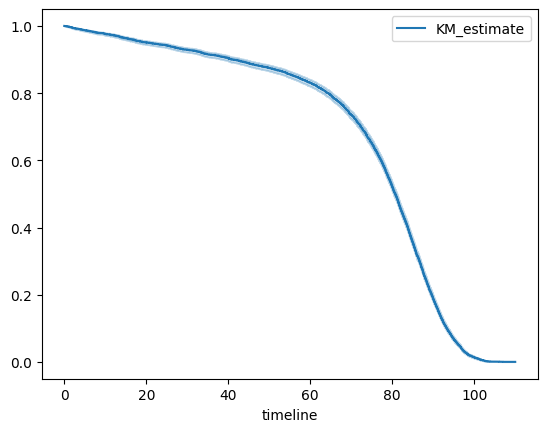

In [24]:
simh.plotSurvival()


In [25]:
print(theta)

[0.6553575, 62.9625, 51.83, 17]


In [26]:
data_file = 'datasets/HUMANS/Denmark_male_1900.csv'
ds = dtds.dsFromFile(data_file)

In [27]:
srh.model(theta,dataSet=ds,n=npeople,t_end=t_end,nsteps=nsteps,time_step_multiplier=time_step_multiplier,parallel=parallel,set_params=set_params,time_range=time_range)

-87743.81176165126

array([<Axes: title={'center': 'Survival'}, xlabel='Age', ylabel='survival'>,
       <Axes: title={'center': 'Hazard'}, xlabel='Age'>,
       <Axes: title={'center': 'Death times distribution'}, xlabel='Death time (days)', ylabel='Probability of death'>],
      dtype=object)

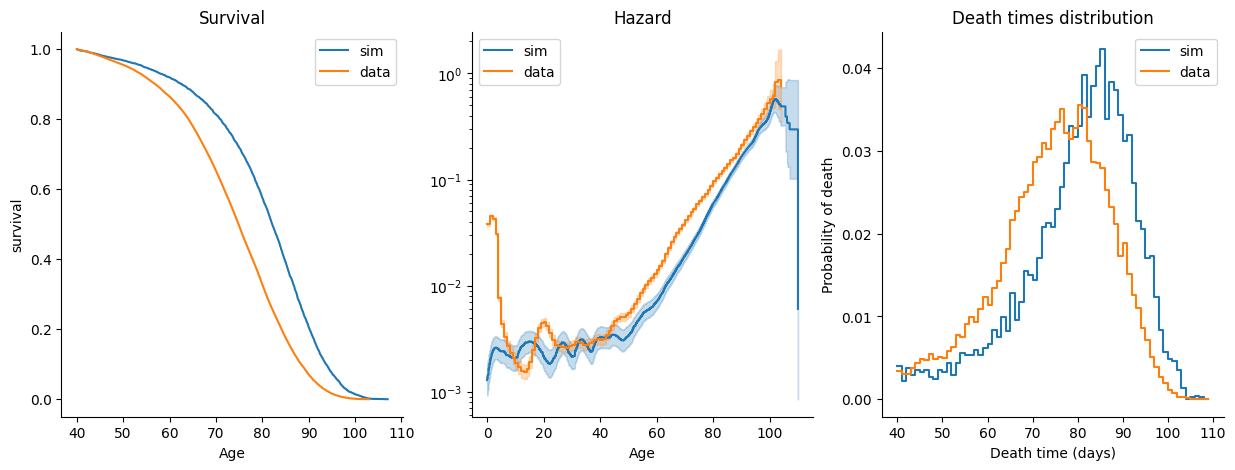

In [28]:
dtds.plotAll([simh,ds],['sim','data'],time_range=time_range)

<Axes: xlabel='Age'>

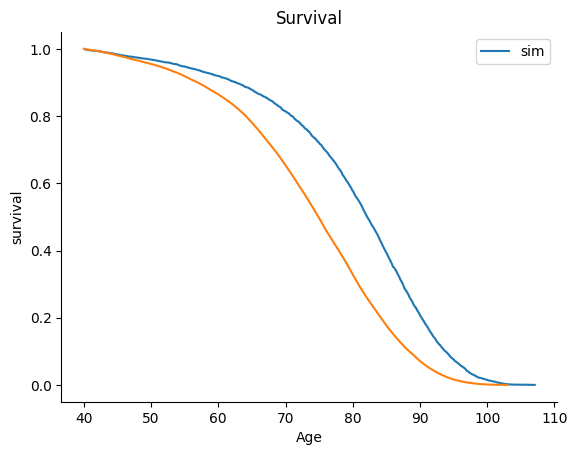

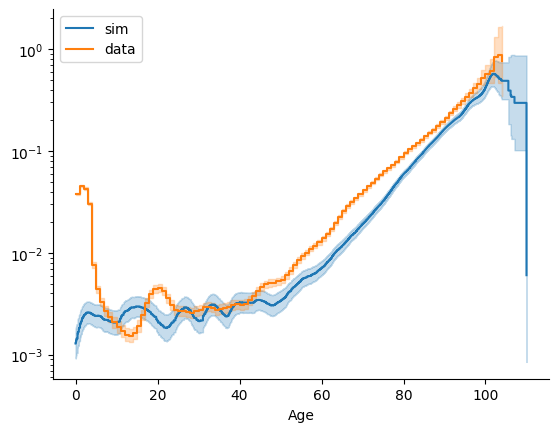

In [29]:
ax = simh.plotSurvival(label='sim',time_range=time_range)
ds.plotSurvival(ax=ax,label='data',time_range=time_range)
ax1 =simh.plotHazard(label='sim')
ds.plotHazard(ax=ax1,label='data')

In [5]:
theta = [0.314,0.121,223.261,185.273]
eta = theta[0]
beta = theta[1]
epsilon = theta[2]
xc = theta[3]
npeople = 20000
t_end = 80
nsteps = 5000
time_step_multiplier = 1
parallel = True
yeastSR = srmc.getSr(theta, npeople=npeople, t_end=t_end, nsteps=nsteps, time_step_multiplier=time_step_multiplier, parallel=parallel)

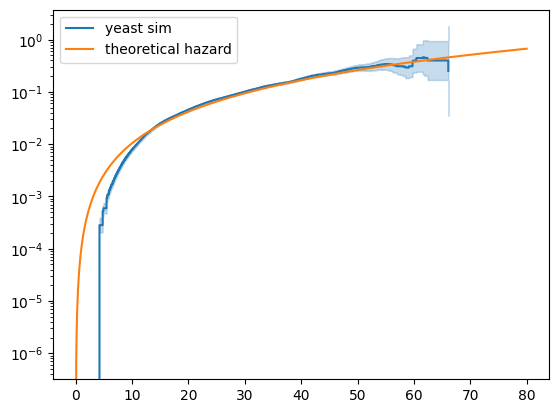

In [8]:
ax = yeastSR.plotHazard(label ='yeast sim')
ax.set_yscale('log')
t = np.linspace(0, 80, 1000)
h = 3/(16*epsilon)*(eta*t)**2
h =h*10**0.1
ax.plot(t,h, label='theoretical hazard')
ax.legend()
